### # Besides coffee, grunge and technology companies, one of the things that Seattle is most famous for is how often it rains. This dataset contains complete records of daily rainfall patterns from January 1st, 1948 to December 12, 2017

### Content
This data was collected at the Seattle-Tacoma International Airport. The dataset contains five columns:

- 1. DATE = the date of the observation
- 2. PRCP = the amount of precipitation, in inches
- 3. TMAX = the maximum temperature for that day, in degrees Fahrenheit
- 4. TMIN = the minimum temperature for that day, in degrees Fahrenheit
- 5. RAIN = TRUE if rain was observed on that day, FALSE if it was not

#### Tasks: Build a model of whether it will rain on a specific day given information on the previous days

In [19]:
# import necessary libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('seattleWeather_1948-2017.csv')
df.head(5)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
df.shape

(25551, 5)

In [5]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [6]:
#Print rows of missing values for PRCP
print(df.loc[df['PRCP'].isnull()])

             DATE  PRCP  TMAX  TMIN RAIN
18415  1998-06-02   NaN    72    52  NaN
18416  1998-06-03   NaN    66    51  NaN
21067  2005-09-05   NaN    70    52  NaN


In [7]:
#Print rows of missing values for RAIN
print(df.loc[df['RAIN'].isnull()])

             DATE  PRCP  TMAX  TMIN RAIN
18415  1998-06-02   NaN    72    52  NaN
18416  1998-06-03   NaN    66    51  NaN
21067  2005-09-05   NaN    70    52  NaN


In [8]:
# These are the same rows, let's drop missing values
df = df.dropna()
df.shape

(25548, 5)

In [9]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387
std,0.239031,12.773265,8.893019
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


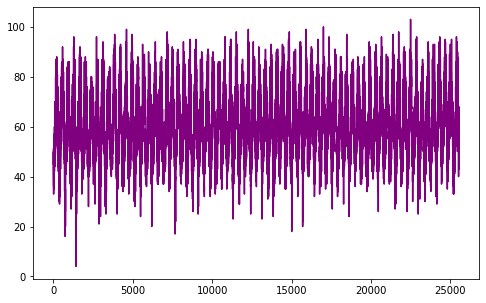

In [10]:
plt.figure(figsize=(8,5))
df['TMAX'].plot(kind='line',color='purple')
plt.show()

<AxesSubplot:xlabel='RAIN', ylabel='TMAX'>

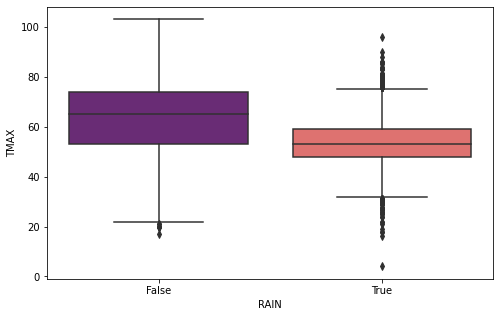

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='RAIN',y='TMAX',data=df,palette='magma')

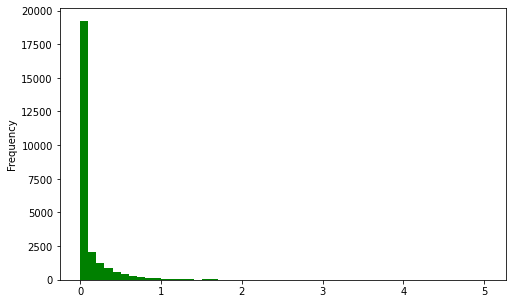

In [12]:
plt.figure(figsize=(8,5))
df['PRCP'].plot(kind='hist',bins=50,color='green')
plt.show()

In [13]:
#Convert RAIN column to numeric
df['RAIN']=[1 if i==True else 0 for i in df['RAIN']]
df

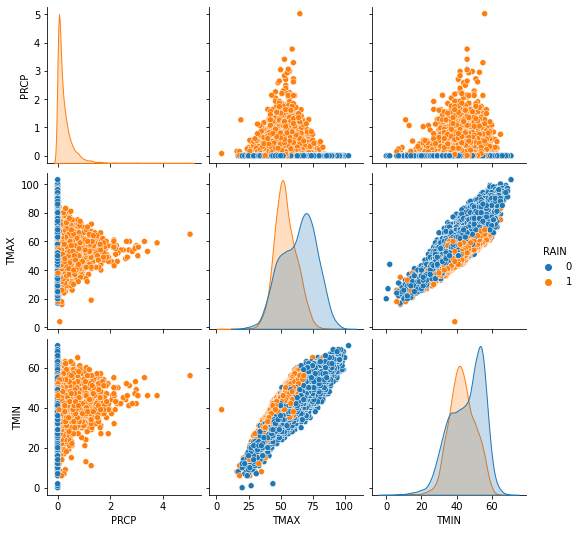

In [20]:
sns.pairplot(df, hue='RAIN')
plt.show()

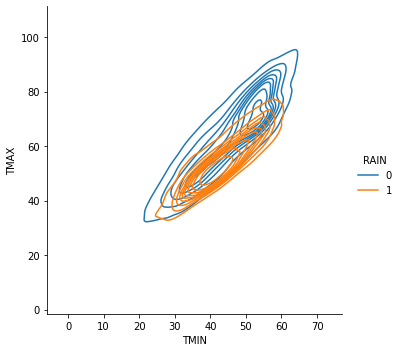

In [21]:
sns.displot(data=df, x='TMIN', y='TMAX', hue='RAIN', kind='kde')

-t seems an easy classification problem when you see it. But uncertainty of not raining is tricky as you can see on the above.

In [14]:
X=df[['PRCP', 'TMAX', 'TMIN']]
y=df[['RAIN']]

In [22]:
X.shape, y.shape

((25548, 3), (25548, 1))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn import metrics

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [17]:
# Normalize values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
prediction_lr = logistic.predict(X_test)
print("Accuracy Score of Logistic Regression is: ",accuracy_score(y_test,prediction_lr))
print(classification_report(y_test,prediction_lr))

Accuracy Score of Logistic Regression is:  0.9639921722113503
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2928
           1       1.00      0.92      0.96      2182

    accuracy                           0.96      5110
   macro avg       0.97      0.96      0.96      5110
weighted avg       0.97      0.96      0.96      5110



In [35]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
prediction_dt = tree.predict(X_test)
print("Accuracy Score of Decision Tree Classifier is: ",accuracy_score(y_test,prediction_dt))
print(classification_report(y_test,prediction_dt))

Accuracy Score of Decision Tree Classifier is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2928
           1       1.00      1.00      1.00      2182

    accuracy                           1.00      5110
   macro avg       1.00      1.00      1.00      5110
weighted avg       1.00      1.00      1.00      5110



In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
prediction_rf = forest.predict(X_test)
print("Accuracy Score of Random Forest Classifier is: ",accuracy_score(y_test,prediction_rf))
print(classification_report(y_test, prediction_rf))

Accuracy Score of Random Forest Classifier is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2928
           1       1.00      1.00      1.00      2182

    accuracy                           1.00      5110
   macro avg       1.00      1.00      1.00      5110
weighted avg       1.00      1.00      1.00      5110



In [40]:
import xgboost
xgb = xgboost.XGBClassifier(eval_metric='logloss')
xgb.fit(X_train,y_train)
prediction_xgb = xgb.predict(X_test)
print("Accuracy Score of SXboost Classifier is: ",accuracy_score(y_test,prediction_xgb))
print(classification_report(y_test, prediction_xgb))

Accuracy Score of SXboost Classifier is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2928
           1       1.00      1.00      1.00      2182

    accuracy                           1.00      5110
   macro avg       1.00      1.00      1.00      5110
weighted avg       1.00      1.00      1.00      5110



#### Create Model using ANN

##### What is an artificial neural network?
Artificial neural networks are one of the main tools used in machine learning. As the “neural” part of their name suggests, they are brain-inspired systems which are intended to replicate the way that we humans learn. Neural networks consist of input and output layers, as well as (in most cases) a hidden layer consisting of units that transform the input into something that the output layer can use. They are excellent tools for finding patterns which are far too complex or numerous for a human programmer to extract and teach the machine to recognize.

While neural networks (also called “perceptrons”) have been around since the 1940s, it is only in the last several decades where they have become a major part of artificial intelligence. This is due to the arrival of a technique called “backpropagation,” which allows networks to adjust their hidden layers of neurons in situations where the outcome doesn’t match what the creator is hoping for — like a network designed to recognize dogs, which misidentifies a cat, for example.

Another important advance has been the arrival of deep learning neural networks, in which different layers of a multilayer network extract different features until it can recognize what it is looking for.

In [41]:
# Create model usinf ANN

import tensorflow.keras 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [42]:
model = Sequential([
    Dense(32, activation='relu', input_dim=3),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10,verbose=2)

Epoch 1/10
2044/2044 - 3s - loss: 0.0820 - accuracy: 0.8947
Epoch 2/10
2044/2044 - 2s - loss: 0.0241 - accuracy: 0.9728
Epoch 3/10
2044/2044 - 2s - loss: 0.0088 - accuracy: 0.9909
Epoch 4/10
2044/2044 - 2s - loss: 0.0042 - accuracy: 0.9960
Epoch 5/10
2044/2044 - 2s - loss: 0.0029 - accuracy: 0.9969
Epoch 6/10
2044/2044 - 2s - loss: 0.0037 - accuracy: 0.9956
Epoch 7/10
2044/2044 - 2s - loss: 0.0023 - accuracy: 0.9975
Epoch 8/10
2044/2044 - 2s - loss: 0.0037 - accuracy: 0.9955
Epoch 9/10
2044/2044 - 2s - loss: 0.0020 - accuracy: 0.9978
Epoch 10/10
2044/2044 - 2s - loss: 0.0022 - accuracy: 0.9974


In [45]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


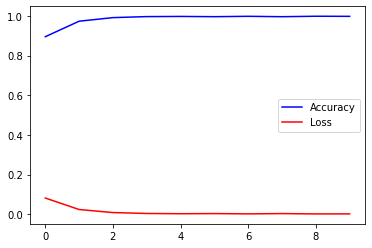

In [46]:
plt.plot(history.history['accuracy'], label='Accuracy', color='blue')
plt.plot(history.history['loss'], label='Loss', color='red')
plt.legend()

In [47]:
prediction_nn = model.predict(X_test)
prediction_nn = [1 if y>=0.5 else 0 for y in prediction_nn]
print(classification_report(y_test, prediction_nn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2928
           1       1.00      1.00      1.00      2182

    accuracy                           1.00      5110
   macro avg       1.00      1.00      1.00      5110
weighted avg       1.00      1.00      1.00      5110



In [53]:
print(prediction_nn)

[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 